<a href="https://colab.research.google.com/github/sodeidelphonse/sodeidelphonse/blob/main/Supervise_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLASSIFICATION PROBLEM**

In a classification problem, the goal is to predict a categorical outcome variable. This could involve predicting something like whether an email is spam or not spam, based on its content. The output is a class label, which is one of a finite set of options. Classification problems can be binary (two classes, like the spam example) or multiclass (more than two classes). Some examples of classification algorithms include logistic regression, decision trees for classification, support vector machines, and neural networks for classification tasks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm


In [ ]:
!wget https://raw.githubusercontent.com/MMagdys/MAGIC-Gamma-Telescope-Classification/master/magic04.data

--2023-07-01 18:52:31--  https://raw.githubusercontent.com/MMagdys/MAGIC-Gamma-Telescope-Classification/master/magic04.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [text/plain]
Saving to: ‘magic04.data.3’

magic04.data.3      100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2023-07-01 18:52:31 (22.0 MB/s) - ‘magic04.data.3’ saved [1477391/1477391]



In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [ ]:
# Check for missing entries
print(df.isnull().sum())

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [ ]:
# df.salary.value_counts().plot(kind='bar')
print(df['class'].unique())

['g' 'h']


In [ ]:
df = df.replace({'h': 0, 'g': 1})
df.head(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1


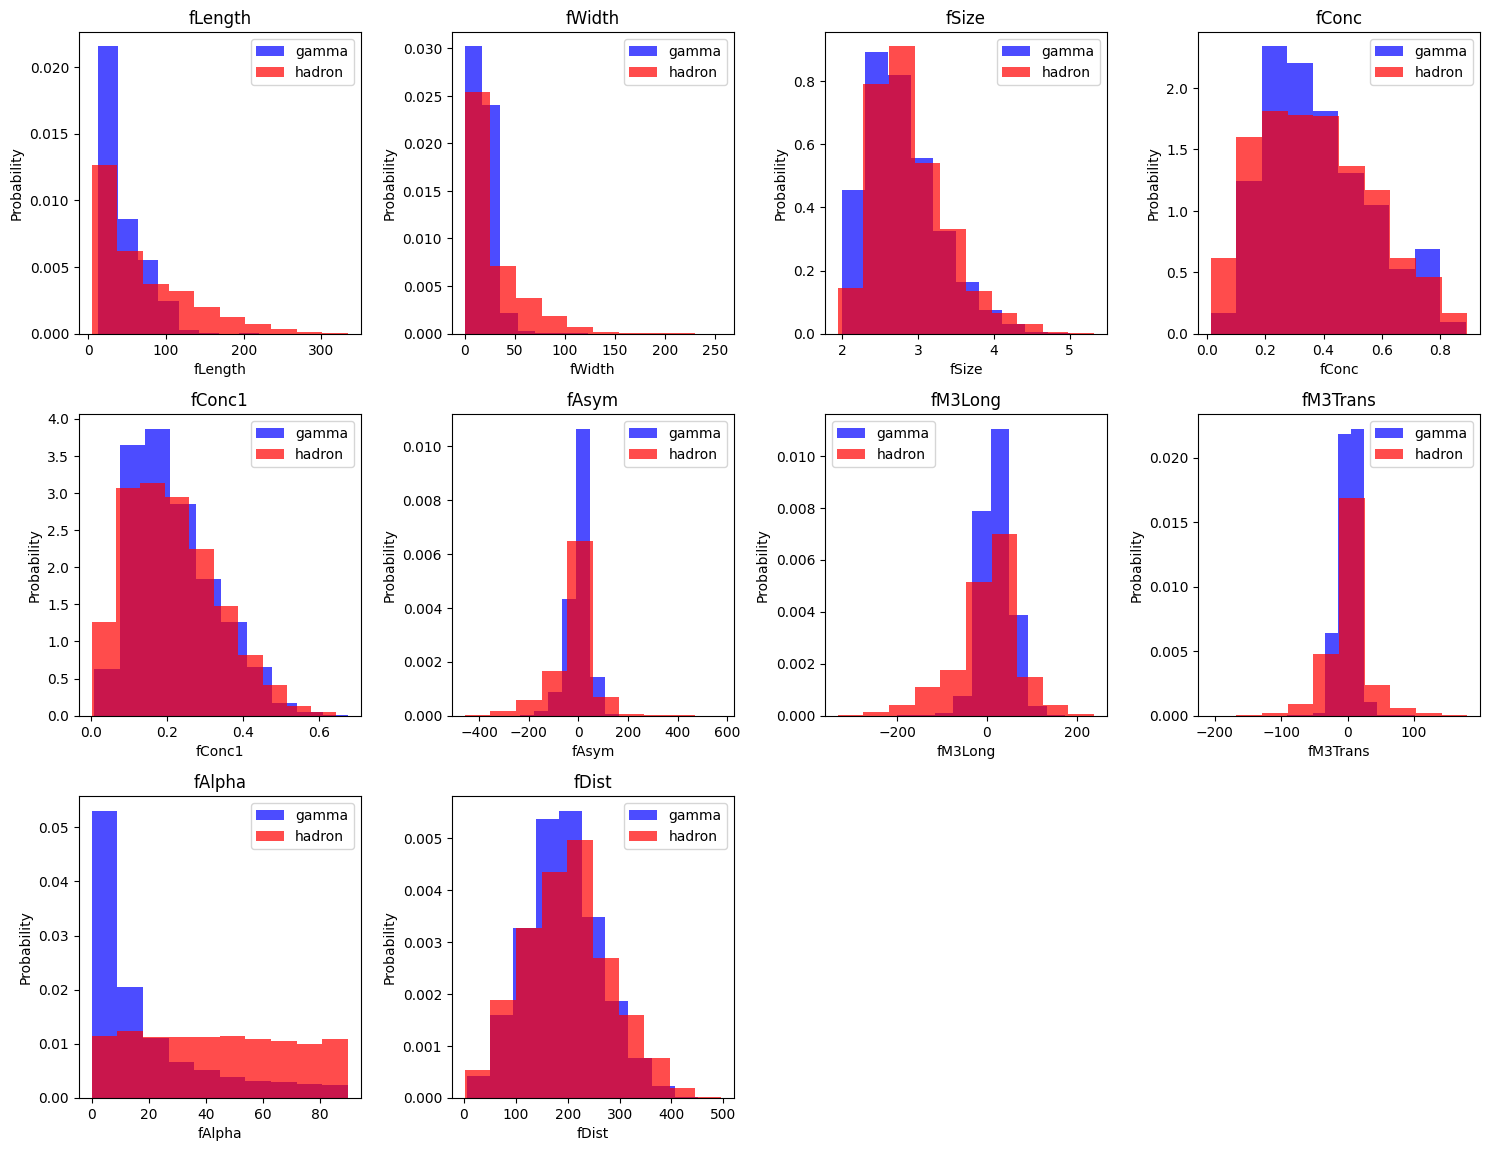

In [ ]:
# Determine the number of features (excluding the target)
n_features = len(cols) - 1

# Calculate the dimensions of the grid
grid_dim = int(np.ceil(np.sqrt(n_features)))

fig, axs = plt.subplots(grid_dim, grid_dim, figsize=(15, 15))

# Flatten the axes array, in case the number of subplots is not a perfect square
axs = axs.ravel()

for i, label in enumerate(cols[:-1]):
  axs[i].hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  axs[i].hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  axs[i].set_title(label)
  axs[i].set_ylabel("Probability")
  axs[i].set_xlabel(label)
  axs[i].legend()

# Remove the unused subplots, if any
for j in range(i+1, grid_dim*grid_dim):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


#Train, validation, test datasets

In [ ]:
train, test = np.split(df.sample(frac=1), [int(0.7*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

## **Supervised Learning Algorithms**

**`Linear Regression:`** Imagine you're a cricket coach, and you want to predict how many runs a player will score in a match based on the number of hours they practice. You've noticed in the past that the more a player practices, the better they seem to do in the matches. But can you quantify this relationship? This is where linear regression comes in.

Linear regression is like drawing a straight line through a scatter plot of data points. The line is drawn such that it best represents all the data points. If you were to put the number of hours practiced on the x-axis (horizontal) and the number of runs scored on the y-axis (vertical), linear regression would give you a line that best fits through these points.

The goal of the line is to minimize the distance from all the points to itself, ideally having an equal number of points above and below. Once you have this line, you can use it to predict the y-value (runs scored) for any given x-value (hours practiced).

In more technical terms, the equation of this line is typically written as y = mx + b, where:

y is the value we're trying to predict (runs scored)
x is the value we're using to make the prediction (hours practiced)
m is the slope of the line, which tells us how much y changes for each unit change in x
b is the y-intercept of the line, which is the value of y when x is 0.
So, with linear regression, we're basically trying to find the values of m (slope) and b (intercept) that provide the best fit line for our data.

Linear regression is one of the simplest and most widely used types of predictive analysis in statistics and machine learning, and it's a great starting point for understanding more complex models and algorithms.

**`K-Nearest Neighbors (KNN):`** Imagine you're at a party and you don't know anyone. But you tend to hang out with people who are similar to you, right? This is the basic idea of KNN - it classifies a data point based on how its neighbors are classified. The 'K' is the number of neighbors it checks.

**`Logistic Regression:`** Suppose you want to predict whether it will rain tomorrow or not. You may consider factors like today's temperature, humidity, and wind speed. Logistic Regression uses these features to predict probabilities (e.g., there's a 80% chance it will rain tomorrow). It's called 'logistic' because it uses a mathematical function called the logistic function to calculate the probabilities.

**`Decision Trees:`** Imagine you're playing a game of 20 Questions. At each step, you ask a question that splits the remaining possibilities in half (Is it an animal? Does it have fur? etc). That's how Decision Trees work - they ask a series of Yes/No questions about the data (Is age > 20?, Is income < 50k?) until they arrive at a decision.

**`Random Forests:`** In a forest, there are many trees, right? Similarly, a Random Forest algorithm is made up of many Decision Trees. The idea is to create many different trees based on random subsets of the data, and have each tree make its own prediction. The final prediction is the one that gets the most votes from all the trees.

**`Naive Bayes:`** This algorithm is a bit like a gullible person, it makes very naive assumptions about the data, and yet, surprisingly, it often works pretty well. For example, it might predict whether an email is spam based on the frequency of certain words in the email ('win', 'money', etc), while naively assuming that these words are independent of each other.

**`Multilayer Perceptron (MLP):`** This is the most basic type of artificial neural network. Just like how our brain is made up of neurons interconnected in complex ways, an MLP is made up of layers of nodes (the "neurons"), where each node in a layer is connected to all nodes in the next layer. Each node learns to recognize different patterns in the data, and the final layer combines the outputs of all nodes in the previous layer to make a prediction.

**`Support Vector Machine (SVM):`** Imagine you're at a park and you see two different species of dogs playing around. You're asked to draw a boundary line that separates these two species. You'll try to draw this line in such a way that the distance from the line to the nearest dog from either group is maximized. This is essentially what an SVM does - it finds a line (or in higher dimensions, a hyperplane) that separates two classes of data, while maximizing the margin between the closest points (the "support vectors") to the line from each class.

In [ ]:
# Initialize classifiers
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier(max_iter=500),
    svm.SVC(kernel='linear')
]

# Training and evaluating classifiers
results = {}

for clf in classifiers:
    name = clf.__class__.__name__

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

# Print the results
for name, metrics in results.items():
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'\t{metric}: {value}')


KNeighborsClassifier:
	accuracy: 0.8205397826848931
	precision: 0.8194854071317399
	recall: 0.8205397826848931
	f1_score: 0.8199286242146681
LogisticRegression:
	accuracy: 0.7812828601472135
	precision: 0.785832632844709
	recall: 0.7812828601472135
	f1_score: 0.7830071599300062
DecisionTreeClassifier:
	accuracy: 0.807570977917981
	precision: 0.8081323077438045
	recall: 0.807570977917981
	f1_score: 0.8078367231244074
RandomForestClassifier:
	accuracy: 0.8741675429372591
	precision: 0.8730572742193998
	recall: 0.8741675429372591
	f1_score: 0.87301626506847
GaussianNB:
	accuracy: 0.7234490010515248
	precision: 0.7145045260925807
	recall: 0.7234490010515248
	f1_score: 0.7018925381757514
MLPClassifier:
	accuracy: 0.8633017875920084
	precision: 0.8639748151392118
	recall: 0.8633017875920084
	f1_score: 0.8635977626372098
SVC:
	accuracy: 0.7832106554504031
	precision: 0.7863560808642786
	recall: 0.7832106554504031
	f1_score: 0.784490417397893


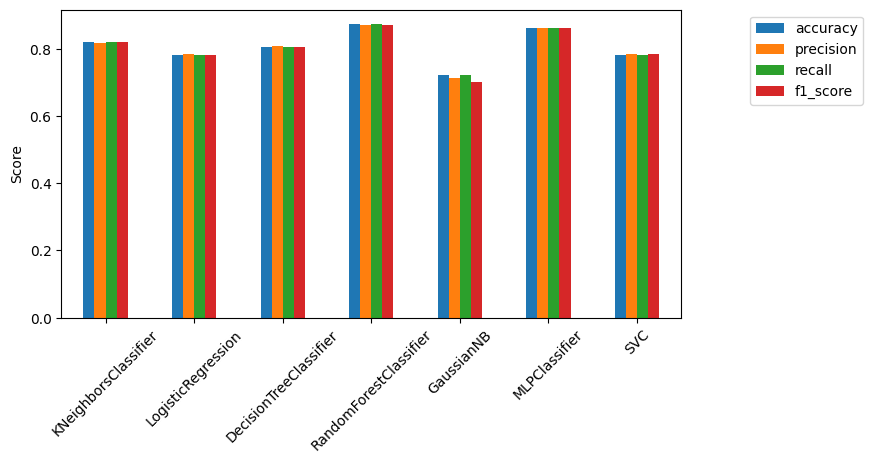

In [ ]:
# Convert the results dictionary into a DataFrame for easier plotting
results_df = pd.DataFrame(results).transpose()

# Plotting
results_df.plot(kind='bar', figsize=(8, 4)).legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()




In [ ]:
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)

    # Get the predicted probabilities
    y_pred_proba = clf.predict_proba(X_test)

    break

print(y_pred_proba[:5])
print(y_test[:5])

[[0.  1. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]]
[1 0 0 0 0]
